In [106]:
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns

#### Cargando los datos

In [107]:
datos = pd.read_csv('..\\datos_sin_procesar\\datos.csv')
datos.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


#### Limpieza datos entrenamiento (datos)

In [108]:
print('Forma de los datos: {}'.format(datos.shape))

Forma de los datos: (1460, 81)


In [109]:
datos.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

#### 1. Cambiando los valores NAN en las variables categóricas por el valor N/A

In [110]:
for columna in datos.select_dtypes(include='object').columns.to_list():
    datos[columna].fillna('N/A', inplace=True)

#### 2. Eliminando valores faltandes 

In [111]:
datos.dropna(inplace=True)
datos.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1121 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1121 non-null   int64  
 1   MSSubClass     1121 non-null   int64  
 2   MSZoning       1121 non-null   object 
 3   LotFrontage    1121 non-null   float64
 4   LotArea        1121 non-null   int64  
 5   Street         1121 non-null   object 
 6   Alley          1121 non-null   object 
 7   LotShape       1121 non-null   object 
 8   LandContour    1121 non-null   object 
 9   Utilities      1121 non-null   object 
 10  LotConfig      1121 non-null   object 
 11  LandSlope      1121 non-null   object 
 12  Neighborhood   1121 non-null   object 
 13  Condition1     1121 non-null   object 
 14  Condition2     1121 non-null   object 
 15  BldgType       1121 non-null   object 
 16  HouseStyle     1121 non-null   object 
 17  OverallQual    1121 non-null   int64  
 18  OverallC

#### 3. Columnas irrelevantes

In [112]:
#Conteo de los niveles en las diferentes columnas categóricas
for columna in datos.select_dtypes(include='object').columns.to_list():
    print('Columna {}:\t\t{} subniveles'.format(columna, datos[columna].nunique()))


Columna MSZoning:		5 subniveles
Columna Street:		2 subniveles
Columna Alley:		3 subniveles
Columna LotShape:		4 subniveles
Columna LandContour:		4 subniveles
Columna Utilities:		1 subniveles
Columna LotConfig:		5 subniveles
Columna LandSlope:		3 subniveles
Columna Neighborhood:		25 subniveles
Columna Condition1:		9 subniveles
Columna Condition2:		6 subniveles
Columna BldgType:		5 subniveles
Columna HouseStyle:		8 subniveles
Columna RoofStyle:		5 subniveles
Columna RoofMatl:		7 subniveles
Columna Exterior1st:		14 subniveles
Columna Exterior2nd:		16 subniveles
Columna MasVnrType:		4 subniveles
Columna ExterQual:		4 subniveles
Columna ExterCond:		4 subniveles
Columna Foundation:		6 subniveles
Columna BsmtQual:		5 subniveles
Columna BsmtCond:		5 subniveles
Columna BsmtExposure:		5 subniveles
Columna BsmtFinType1:		7 subniveles
Columna BsmtFinType2:		7 subniveles
Columna Heating:		5 subniveles
Columna HeatingQC:		5 subniveles
Columna CentralAir:		2 subniveles
Columna Electrical:		6 subnivel

In [113]:
#La columna Utilities tiene unicamente un subnivel, por lo cual, será eliminada. También se eliminará la columna Id debido a que no aporta información para el problema
datos.drop(['Utilities', 'Id'], axis=1, inplace=True)


#### Verificando que las columnas numéricas no tengan un único valor

In [114]:
datos.describe().loc['std',:]

MSSubClass          41.772684
LotFrontage         24.266812
LotArea           8129.302641
OverallQual          1.380822
OverallCond          1.068236
YearBuilt           30.967730
YearRemodAdd        21.025974
MasVnrArea         189.500966
BsmtFinSF1         468.385038
BsmtFinSF2         157.828725
BsmtUnfSF          450.259657
TotalBsmtSF        445.656500
1stFlrSF           386.174253
2ndFlrSF           438.561788
LowQualFinSF        41.595469
GrLivArea          523.723899
BsmtFullBath         0.512298
BsmtHalfBath         0.232554
FullBath             0.550117
HalfBath             0.498738
BedroomAbvGr         0.771935
KitchenAbvGr         0.206900
TotRmsAbvGrd         1.591195
Fireplaces           0.632556
GarageYrBlt         25.822833
GarageCars           0.654313
GarageArea         191.243043
WoodDeckSF         121.868623
OpenPorchSF         64.390029
EnclosedPorch       61.282083
3SsnPorch           29.772540
ScreenPorch         57.801829
PoolArea            40.222087
MiscVal   

Todas las columnas numéricas tienen desviaciones estándar diferentes de cero, lo que indica que no tienen un único valor

Preservaremos todas las columnas numéricas

#### Verificando que no se tengan columnas repetidas

In [115]:
print('Tamaño del set antes de eliminar las filas repetidas: {}'.format(datos.shape))
datos.drop_duplicates(inplace=True)
print('Tamaño del set después de eliminar las filas repetidas: {}'.format(datos.shape))

Tamaño del set antes de eliminar las filas repetidas: (1121, 79)
Tamaño del set después de eliminar las filas repetidas: (1121, 79)


#### Errores tipográficos en variables categóricas

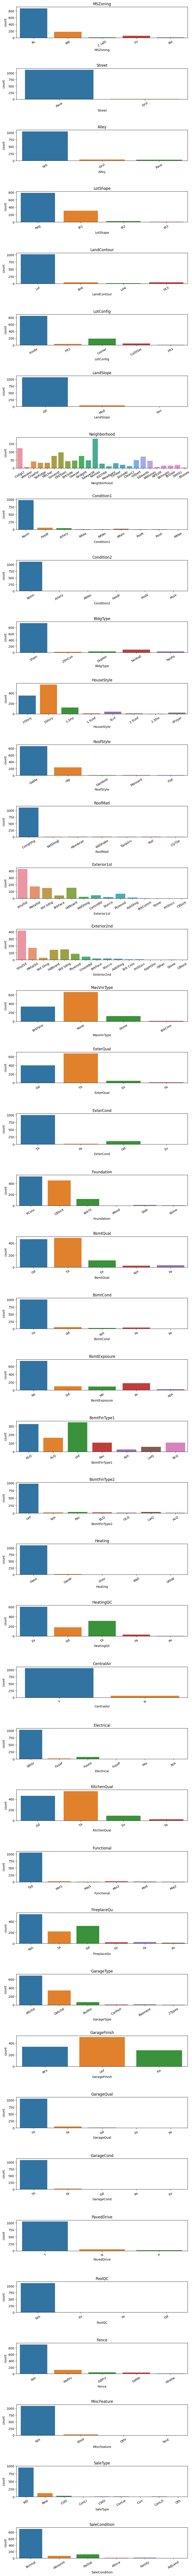

In [116]:
#Graficar los subniveles de cada variable categórica
cols_cat = datos.select_dtypes(include='object').columns.to_list()

fig, ax = plt.subplots(nrows=len(cols_cat), ncols=1, figsize=(10,150))
fig.subplots_adjust(hspace=1)

for i, col in enumerate(cols_cat):
  sns.countplot(x=col, data=datos, ax=ax[i])
  ax[i].set_title(col)
  ax[i].set_xticklabels(ax[i].get_xticklabels(),rotation=30)

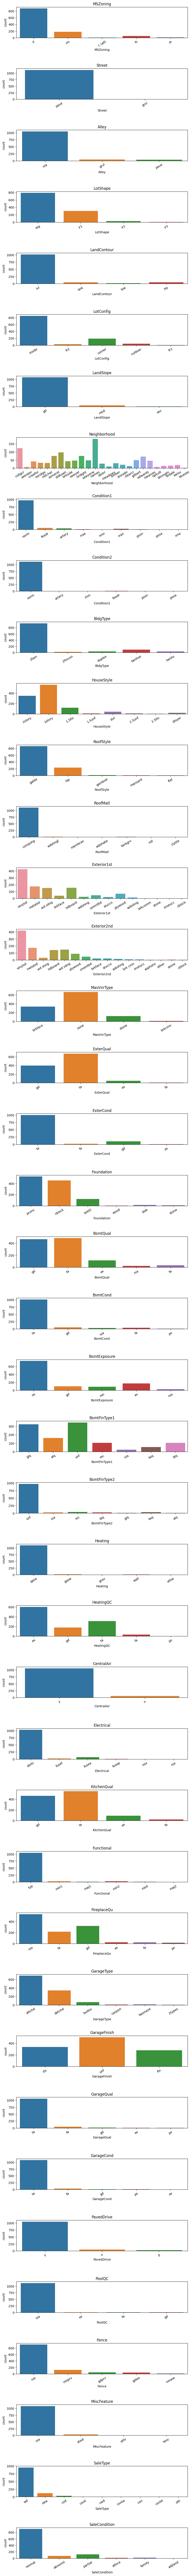

In [117]:
#Convirtiendo todo a minusculas
#Graficar los subniveles de cada variable categórica
cols_cat = datos.select_dtypes(include='object').columns.to_list()

for columna in cols_cat:
    datos[columna] = datos[columna].str.lower()

fig, ax = plt.subplots(nrows=len(cols_cat), ncols=1, figsize=(10,150))
fig.subplots_adjust(hspace=1)

for i, col in enumerate(cols_cat):
  sns.countplot(x=col, data=datos, ax=ax[i])
  ax[i].set_title(col)
  ax[i].set_xticklabels(ax[i].get_xticklabels(),rotation=30)

#### Convirtiendo variables categóricas en numéricas

In [118]:
cols_cat = datos.select_dtypes(include='object').columns.to_list()
codificador = {}
for columna in cols_cat:
    lista_valores = list(datos[columna].unique())
    dic_val = {}
    for indice, clave in enumerate(lista_valores):
        dic_val[clave] = indice
    codificador[columna] = dic_val
    datos[columna] = datos[columna].map(dic_val)


Se guarda el contenido de la variable `codificador`, la cual contiene el registro de cómo se transformaron las variables categóricas en variables numéricas

In [119]:
import json
with open('..\codificador_variables_categoricas\codificador_variables.txt', 'w') as f:
    json.dump(codificador, f, indent=4)

#### Guardando el archivo procesado en la carpeta datos_procesados

In [120]:
datos.to_csv('..\datos_procesados\datos_procesados.csv')